In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("./datasets/evdataset.csv")

In [15]:
df.head()

,id,Brand,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Brand                        194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [17]:
images_data = df[['id', 'Brand', 'link']]

In [18]:
df.isnull().sum()

id                             0
Brand                          0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

<Axes: xlabel='Brand'>

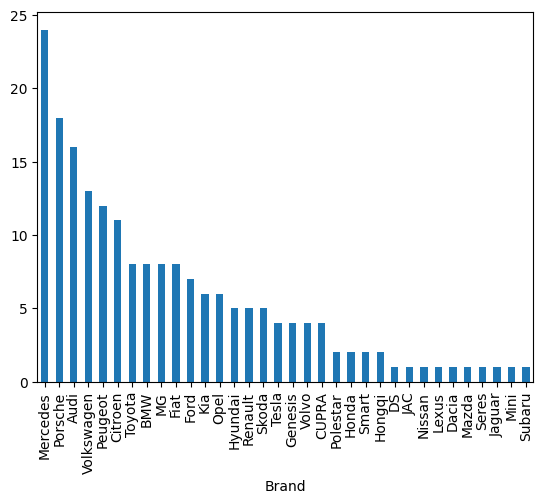

In [26]:
df['Brand'].value_counts().plot(kind='bar')

In [40]:
main = df[['Brand','Drive','Acceleration 0 - 100 km/h', 'Top Speed',
       'Total Power', 'Total Torque', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats','Electric Range']]

In [43]:
main.shape

(194, 19)

In [41]:
main.head()

,Brand,Drive,Acceleration 0 - 100 km/h,Top Speed,Total Power,Total Torque,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,Electric Range
0,Genesis,Rear,7.8,185,168,350,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5,390
1,Mercedes,AWD,6.2,160,215,520,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7,330
2,Porsche,AWD,3.2,260,500,850,93.4,11.0,46,1020,4963,1966,1381,2900,2880,575,366,4,415
3,BMW,Rear,5.7,190,250,430,83.9,11.0,54,730,4783,1852,1448,2856,2605,555,470,5,470
4,Volkswagen,Rear,7.9,160,150,310,82.0,11.0,55,570,4261,1809,1568,2771,2300,447,385,5,450


In [58]:
from sklearn.model_selection import train_test_split
X = main.iloc[:,0:18].values
y = main.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from skearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression

In [85]:
# pipes for preprocessiong
# numerical data
pre_num_tr = Pipeline(
    [
        ("imputer", SimpleImputer(strategy='median')),
        ("standard_scaler", StandardScaler())
    ]
)

# catergorical data
pre_cate_tr = Pipeline(
    [
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("ohe", OneHotEncoder(sparse_output=False, dtype=np.int32, handle_unknown='ignore'))
    ]
)

In [86]:
# connecting pipes
numerical_cols = [i for i in range(2,18)]
categorical_cols = [0,1]

preprocessing_tr = ColumnTransformer(
    transformers=[
        ("numerical", pre_num_tr, numerical_cols),
        ("categorical", pre_cate_tr, categorical_cols)
    ],
    remainder='passthrough'
)

In [87]:
lr = LinearRegression()

In [88]:
# final pipe
pipe = Pipeline(
    [
        ("preprocessing", preprocessing_tr),
        ("lr", lr)
    ]
)

In [89]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16,
                                                   17]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [0, 1])])),
                ('lr', LinearRegression())])

In [90]:
y_pred = pipe.predict(X_test)

In [91]:
from sklearn.metrics import r2_score,mean_absolute_error
print("r2", r2_score(y_test, y_pred))
print("mae", mean_absolute_error(y_test, y_pred))

r2 0.9923998224179905
mae 7.053139216712632


In [92]:
y_pred

array([408.52094967, 355.63622524, 426.91875035, 166.29330056,
       326.0765056 , 347.48407068, 388.3629524 , 336.78712784,
       445.30099008, 634.19771794, 296.01617665, 388.54443972,
       451.77360344, 322.26142853, 407.39833065, 159.19930373,
       247.89824082, 305.56734279, 340.7317938 , 345.13778478])

In [93]:
y_test

array([415, 360, 425, 170, 320, 370, 385, 345, 450, 640, 285, 390, 445,
       330, 410, 175, 255, 295, 330, 345])